Load data and libraries;

In [5]:
import pandas as pd
from pandas import read_csv
from plotly import graph_objects as go
#from dare_viz import path

In [6]:
ch4_tac = pd.read_csv(
    "https://raw.githubusercontent.com/dare-uk/dare-viz/main/data/decc_network/tac_ch4.csv",
    index_col = "time",
)
ch4_tac

,mf
time,
2019-01-01 00:00:00,1949.6067
2019-01-01 01:00:00,1949.7004
2019-01-01 02:00:00,1950.2671
2019-01-01 03:00:00,1947.9426
2019-01-01 04:00:00,1950.5607
...,...
2019-12-31 19:00:00,1977.9932
2019-12-31 20:00:00,2001.9976
2019-12-31 21:00:00,1973.9342


In [7]:
ch4_mhd = pd.read_csv(
    "https://raw.githubusercontent.com/dare-uk/dare-viz/main/data/decc_network/mhd_ch4.csv",
    index_col = "time",
)
ch4_mhd

,mf
time,
2019-01-01 01:00:00,1922.4480
2019-01-01 02:00:00,1921.8230
2019-01-01 03:00:00,1926.3110
2019-01-01 04:00:00,1923.1311
2019-01-01 05:00:00,1930.1640
...,...
2019-12-31 19:00:00,1991.8264
2019-12-31 20:00:00,1995.2770
2019-12-31 21:00:00,2009.6525


Basic plots (matlibplot)

<AxesSubplot:xlabel='time'>

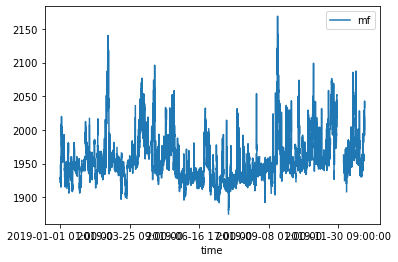

In [9]:
ch4_mhd.plot()

In [10]:
ch4_both = pd.merge(ch4_tac, ch4_mhd, on='time')
ch4_both.rename(columns={'mf_x': 'tac', 'mf_y': 'mhd'}, inplace=True)
ch4_both

,tac,mhd
time,,
2019-01-01 01:00:00,1949.7004,1922.4480
2019-01-01 02:00:00,1950.2671,1921.8230
2019-01-01 03:00:00,1947.9426,1926.3110
2019-01-01 04:00:00,1950.5607,1923.1311
2019-01-01 05:00:00,1958.8646,1930.1640
...,...,...
2019-12-31 19:00:00,1977.9932,1991.8264
2019-12-31 20:00:00,2001.9976,1995.2770
2019-12-31 21:00:00,1973.9342,2009.6525


<AxesSubplot:xlabel='time'>

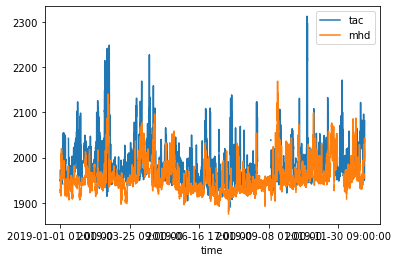

In [11]:
ch4_both.plot()

Plots (Plotly)

In [13]:
fig = go.Figure()

alpha = 0.6
color_mhd = ["rgba(86, 119, 194, 1)", f"rgba(86, 119, 194, {alpha})"] #Sets colour for each line
color_tac = ["rgba(99, 182, 137, 1)", f"rgba(99, 182, 137, {alpha})"]

date_range = ["2019-05-19", "2019-06-21"]
date_range = ["2019-01-01", "2019-12-31"] #Change data range

fig.add_trace(go.Scatter(
    x=ch4_mhd.loc[date_range[0]:date_range[1]].index,
    y=ch4_mhd.loc[date_range[0]:date_range[1]].mf.values,
    mode='lines',
    line=dict(color=color_mhd[0], width=3.),
    showlegend=True,
    name="Mace Head",
    ))

fig.add_trace(go.Scatter(
    x=ch4_tac.loc[date_range[0]:date_range[1]].index,
    y=ch4_tac.loc[date_range[0]:date_range[1]].mf.values,
    mode='lines',
    line=dict(color=color_tac[0], width=3.),
    showlegend=True,
    name="Tacolneston",
    ))

fig.update_layout(
    yaxis_title="Methane (ppm)",
    template="simple_white",
    autosize=False,
    width=550*2,
    height=400*2,
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="right",
        x=0.99,
        traceorder="normal"),
    margin=dict(l=55, r=10, t=10, b=40),
    # paper_bgcolor='rgba(0,0,0,0)',
    # plot_bgcolor='rgba(0,0,0,0)'
)


fig.layout.font.size=40
fig.layout.font.family="Arial"

#fig.write_image("CH4_data_example.png")

fig.show()